In [4]:
# first neural network with keras tutorial
from numpy import loadtxt
from pandas import read_csv
#from pandas import read_
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from keras.models import Model,load_model
from scipy import stats
import numpy as np

In [10]:
!cat /proc/meminfo

MemTotal:       13302912 kB
MemFree:        10301068 kB
MemAvailable:   12139992 kB
Buffers:          121652 kB
Cached:          1809964 kB
SwapCached:            0 kB
Active:          1307820 kB
Inactive:        1464020 kB
Active(anon):     747404 kB
Inactive(anon):      456 kB
Active(file):     560416 kB
Inactive(file):  1463564 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               176 kB
Writeback:             0 kB
AnonPages:        840248 kB
Mapped:           275224 kB
Shmem:              1180 kB
KReclaimable:     113044 kB
Slab:             156784 kB
SReclaimable:     113044 kB
SUnreclaim:        43740 kB
KernelStack:        5968 kB
PageTables:        12944 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651456 kB
Committed_AS:    3729828 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        8452 kB
VmallocChunk:          0 kB
Percpu:          

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [60]:
cd '/content/gdrive/My Drive/gdrive'

/content/gdrive/My Drive/gdrive


In [61]:
#load the dataset
dataset = loadtxt('phpoOxxNn.txt', delimiter=',')
#split into input (X) and output (y) variables
X = dataset[:,0:63]
y = dataset[:,63]



In [62]:
print(X.shape)
print(y.shape)
print(type(X))

(1599, 63)
(1599,)
<class 'numpy.ndarray'>


In [63]:
print(X)

[[0.025391 0.012695 0.003906 ... 0.       0.001953 0.      ]
 [0.004883 0.018555 0.00293  ... 0.       0.       0.      ]
 [0.018555 0.013672 0.00293  ... 0.       0.       0.      ]
 ...
 [0.012695 0.004883 0.006836 ... 0.       0.009766 0.003906]
 [0.000977 0.001953 0.006836 ... 0.       0.016602 0.      ]
 [0.010742 0.017578 0.004883 ... 0.       0.       0.003906]]


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 5)                 320       
                                                                 
 dense_51 (Dense)            (None, 1)                 6         
                                                                 
Total params: 326
Trainable params: 326
Non-trainable params: 0
_________________________________________________________________
None


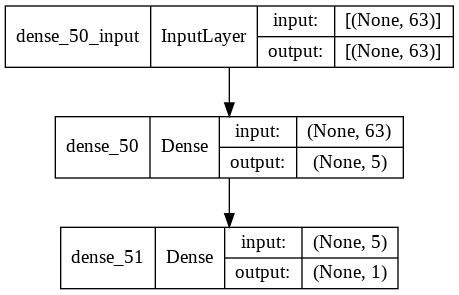

In [82]:
# define the keras model
model = Sequential()
model.add(Dense(5, input_dim=63, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
#from keral.optimizer import adam RMSProp
model.compile(loss='binary_crossentropy', optimizer='RMSProp' , metrics=['accuracy'])#categorical_crossentropy
print(model.summary())
plot_model(model, show_shapes=True, to_file='model1.png')

param_number = output_channel_number * (input_channel_number + 1)

In [77]:

# fit the keras model on the dataset
history=model.fit(X, y, epochs=250, batch_size=10)

Epoch 1/250
160/160 [==============================] - 1s 2ms/step - loss: 0.3438 - accuracy: 0.2026
Epoch 2/250
160/160 [==============================] - 0s 2ms/step - loss: 0.0984 - accuracy: 0.2039
Epoch 3/250
160/160 [==============================] - 0s 2ms/step - loss: 0.0932 - accuracy: 0.2039
Epoch 4/250
160/160 [==============================] - 0s 2ms/step - loss: 0.0911 - accuracy: 0.2039
Epoch 5/250
160/160 [==============================] - 0s 2ms/step - loss: 0.0901 - accuracy: 0.2039
Epoch 6/250
160/160 [==============================] - 0s 2ms/step - loss: 0.0896 - accuracy: 0.2039
Epoch 7/250
160/160 [==============================] - 0s 2ms/step - loss: 0.0893 - accuracy: 0.2039
Epoch 8/250
160/160 [==============================] - 0s 2ms/step - loss: 0.0891 - accuracy: 0.2039
Epoch 9/250
160/160 [==============================] - 0s 2ms/step - loss: 0.0890 - accuracy: 0.2039
Epoch 10/250
160/160 [==============================] - 0s 2ms/step - loss: 0.0889 - accura

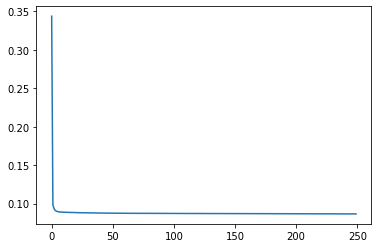

In [78]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'])



In [79]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

50/50 [==============================] - 0s 1ms/step - loss: 0.0866 - accuracy: 0.2039
Accuracy: 20.39


In [80]:
predictions = model.predict(X)

# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[0.025391, 0.012695, 0.003906, 0.004883, 0.039062, 0.0, 0.017578, 0.035156, 0.023438, 0.013672, 0.000977, 0.036133, 0.0, 0.0, 0.0, 0.0, 0.024414, 0.0, 0.02832, 0.021484, 0.0, 0.003906, 0.007812, 0.001953, 0.0, 0.001953, 0.044922, 0.0, 0.027344, 0.0, 0.03125, 0.0, 0.0, 0.069336, 0.0, 0.0, 0.000977, 0.027344, 0.023438, 0.012695, 0.006836, 0.0, 0.011719, 0.16211, 0.005859, 0.022461, 0.025391, 0.013672, 0.0, 0.041016, 0.0, 0.0, 0.0, 0.012695, 0.10352, 0.0, 0.001953, 0.000977, 0.022461, 0.0, 0.0, 0.001953, 0.0] => 0 (expected 0)
[0.004883, 0.018555, 0.00293, 0.0, 0.069336, 0.0, 0.013672, 0.043945, 0.026367, 0.0, 0.0, 0.39551, 0.0, 0.0, 0.0, 0.0, 0.032227, 0.0, 0.010742, 0.027344, 0.0, 0.0, 0.032227, 0.000977, 0.0, 0.0, 0.000977, 0.0, 0.02832, 0.000977, 0.027344, 0.0, 0.0, 0.018555, 0.003906, 0.0, 0.0, 0.020508, 0.0, 0.000977, 0.0, 0.0, 0.000977, 0.003906, 0.03125, 0.014648, 0.012695, 0.037109, 0.0, 0.011719, 0.0, 0.0, 0.0, 0.011719, 0.070312, 0.0, 0.017578, 0.0, 0.004883, 0.0, 0.0, 0.0, 0.0

Epoch 1/200
121/128 [===========================>..] - ETA: 0s - loss: 0.5545 - accuracy: 0.1835
Epoch 00001: val_accuracy improved from -inf to 0.25625, saving model to best_model.h5
128/128 [==============================] - 2s 13ms/step - loss: 0.5476 - accuracy: 0.1853 - val_loss: 0.4216 - val_accuracy: 0.2562
Epoch 2/200
121/128 [===========================>..] - ETA: 0s - loss: 0.3242 - accuracy: 0.1926
Epoch 00002: val_accuracy did not improve from 0.25625
128/128 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.1908 - val_loss: 0.2326 - val_accuracy: 0.2562
Epoch 3/200
123/128 [===========================>..] - ETA: 0s - loss: 0.1757 - accuracy: 0.1927
Epoch 00003: val_accuracy did not improve from 0.25625
128/128 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.1908 - val_loss: 0.1336 - val_accuracy: 0.2562
Epoch 4/200
118/128 [==========================>...] - ETA: 0s - loss: 0.1122 - accuracy: 0.1873
Epoch 00004: val_accu

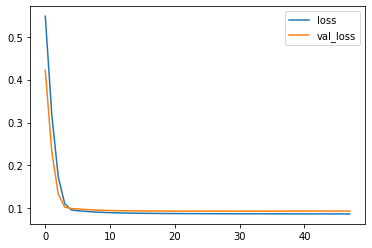

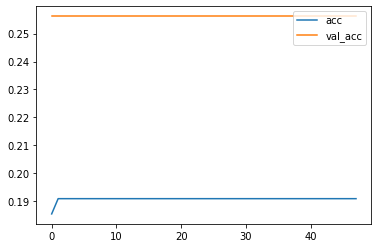

In [83]:
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history=model.fit(X, y, epochs=200, batch_size=10, verbose=1, validation_split=0.2,callbacks=[mc,es]) #validation_data=[test_x, test_y]
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'], loc='upper right')
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc','val_acc'], loc='upper right')

In [70]:
model=load_model('best_model.h5')
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))
predictions = model.predict(X)
# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

50/50 [==============================] - 0s 1ms/step - loss: 0.0874 - accuracy: 0.2039
Accuracy: 20.39
[0.025391, 0.012695, 0.003906, 0.004883, 0.039062, 0.0, 0.017578, 0.035156, 0.023438, 0.013672, 0.000977, 0.036133, 0.0, 0.0, 0.0, 0.0, 0.024414, 0.0, 0.02832, 0.021484, 0.0, 0.003906, 0.007812, 0.001953, 0.0, 0.001953, 0.044922, 0.0, 0.027344, 0.0, 0.03125, 0.0, 0.0, 0.069336, 0.0, 0.0, 0.000977, 0.027344, 0.023438, 0.012695, 0.006836, 0.0, 0.011719, 0.16211, 0.005859, 0.022461, 0.025391, 0.013672, 0.0, 0.041016, 0.0, 0.0, 0.0, 0.012695, 0.10352, 0.0, 0.001953, 0.000977, 0.022461, 0.0, 0.0, 0.001953, 0.0] => 0 (expected 0)
[0.004883, 0.018555, 0.00293, 0.0, 0.069336, 0.0, 0.013672, 0.043945, 0.026367, 0.0, 0.0, 0.39551, 0.0, 0.0, 0.0, 0.0, 0.032227, 0.0, 0.010742, 0.027344, 0.0, 0.0, 0.032227, 0.000977, 0.0, 0.0, 0.000977, 0.0, 0.02832, 0.000977, 0.027344, 0.0, 0.0, 0.018555, 0.003906, 0.0, 0.0, 0.020508, 0.0, 0.000977, 0.0, 0.0, 0.000977, 0.003906, 0.03125, 0.014648, 0.012695, 0.037